In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("gym churn data.csv")

In [3]:
df.sample(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1562,0,1,1,1,1,6,1,30,239.288794,4.0,2,3.714119,3.652660,0
2266,1,1,1,0,1,12,1,32,280.261065,11.0,4,1.830056,1.761358,0
1339,1,0,0,0,1,1,0,28,147.615388,1.0,1,1.783444,1.711822,0
1402,0,1,0,0,1,1,0,25,96.994850,1.0,1,1.525533,2.126957,1
1108,0,1,1,0,1,1,1,29,115.662467,1.0,1,1.456537,1.345585,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
df.iloc[:, [7,8,11,12]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Avg_class_frequency_total,4000.0,1.879020,0.972245,0.000000,1.180875,1.832768,2.536078,6.023668
Avg_class_frequency_current_month,4000.0,1.767052,1.052906,0.000000,0.963003,1.719574,2.510336,6.146783


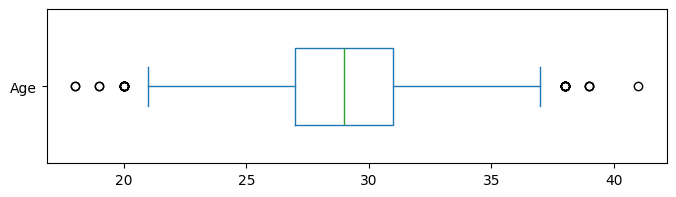

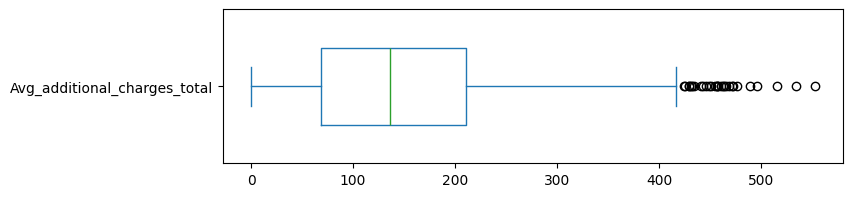

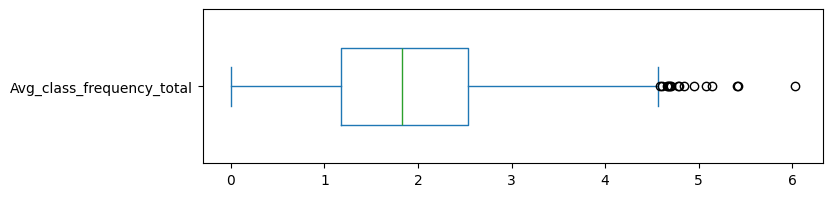

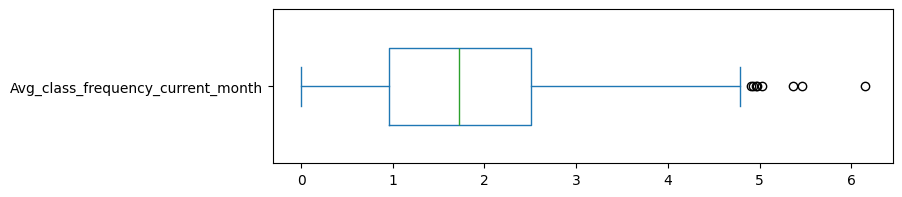

In [9]:
for i in [7,8,11,12]:
    df.iloc[:, i].plot.box(vert=False, figsize=(8,2), widths=0.5)
    plt.show()

In [10]:
df.corr()["Churn"]

gender                               0.000708
Near_Location                       -0.128098
Partner                             -0.157986
Promo_friends                       -0.162233
Phone                               -0.001177
Contract_period                     -0.389984
Group_visits                        -0.175325
Age                                 -0.404735
Avg_additional_charges_total        -0.198697
Month_to_end_contract               -0.381393
Lifetime                            -0.438220
Avg_class_frequency_total           -0.249715
Avg_class_frequency_current_month   -0.412348
Churn                                1.000000
Name: Churn, dtype: float64

In [11]:
df.drop(["gender", "Phone"], axis=1, inplace=True)

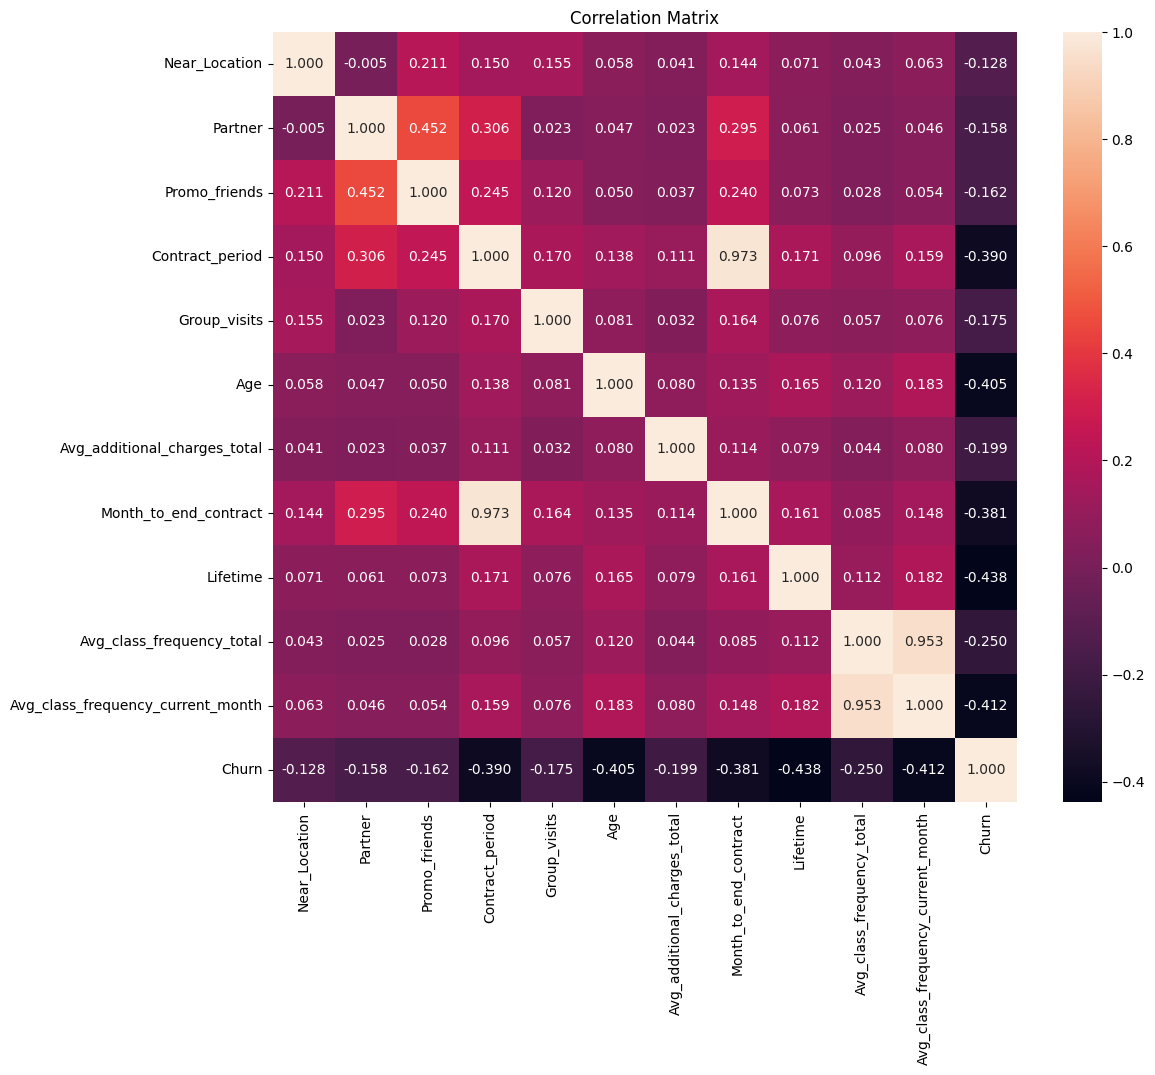

In [13]:
plt.figure(figsize=(12,10))
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True, fmt='.3f')
plt.show()

In [14]:
X= df.drop("Churn", axis=1)

In [15]:
y= df["Churn"]

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.7, random_state=43)

In [23]:
scaler= StandardScaler()

In [24]:
X_train.head()

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
220,1,1,1,1,0,31,259.244902,1.0,3,1.778478,1.621739
2504,1,0,0,6,1,36,198.189377,5.0,3,3.697441,3.880265
2167,1,1,0,1,0,28,96.370420,1.0,2,0.078059,0.000000
1043,1,0,0,12,1,33,275.025084,11.0,4,0.402946,0.508431
3038,1,0,0,1,0,30,311.915088,1.0,3,1.576665,1.626643


In [25]:
X_train.iloc[:, [3,5,6,7,9,10]]= scaler.fit_transform(X_train.iloc[:, [3,5,6,7,9,10]])

In [26]:
X_train.head()

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
220,1,1,1,-0.816315,0,0.541604,1.157550,-0.798825,3,-0.108084,-0.143199
2504,1,0,0,0.277836,1,2.061743,0.524119,0.149335,3,1.877192,2.010947
2167,1,1,0,-0.816315,0,-0.370480,-0.532220,-0.798825,2,-1.867264,-1.689988
1043,1,0,0,1.590817,1,1.149660,1.321264,1.571576,4,-1.531150,-1.205054
3038,1,0,0,-0.816315,0,0.237576,1.703986,-0.798825,3,-0.316871,-0.138521


In [27]:
X_test.iloc[:, [3,5,6,7,9,10]]= scaler.fit_transform(X_test.iloc[:, [3,5,6,7,9,10]])

In [28]:
X_test

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
376,1,0,0,-0.792843,1,-3.174913,0.183180,-0.779207,0,-1.058844,-1.426017
777,0,1,0,-0.792843,1,-1.289604,0.701544,-0.779207,3,0.135655,0.124887
2012,0,0,0,-0.792843,0,-0.661168,-1.456966,-0.779207,1,0.143366,-1.507034
309,1,1,0,0.318619,0,1.224142,-0.712477,-0.051543,7,1.642726,1.589943
3276,1,1,1,0.318619,1,-0.032731,-1.374451,0.433566,1,0.035746,0.282463
...,...,...,...,...,...,...,...,...,...,...,...
1816,1,1,1,0.318619,0,0.909924,0.803175,0.433566,4,0.400061,0.551762
3039,1,1,0,-0.792843,0,0.595705,-0.901964,-0.779207,2,0.593514,0.767551
433,1,1,1,1.652373,1,-0.661168,0.029148,1.161230,4,0.545141,0.553606
151,1,0,0,1.652373,0,-0.346949,2.821313,0.676121,6,1.641907,1.726408


In [30]:
model= KNeighborsClassifier(n_neighbors=11, n_jobs=-1)

In [31]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=11)

In [32]:
model.score(X_train, y_train)

0.9228571428571428

In [33]:
y_pred= model.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred)

0.9175

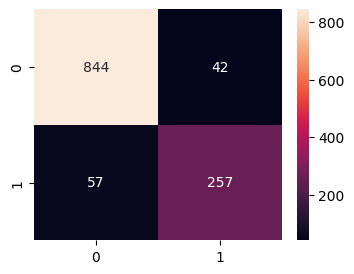

In [35]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.show()

In [36]:
gscv= GridSearchCV(estimator=KNeighborsClassifier(), param_grid={"n_neighbors":[5,7,9,11,13,15,17,19,21,23,25,27]}, verbose=True, cv=10, n_jobs=-1)

In [37]:
gscv.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27]},
             verbose=True)

In [38]:
gscv.best_estimator_

KNeighborsClassifier(n_neighbors=27)

In [39]:
new_y_pred= gscv.best_estimator_.predict(X_test)

In [40]:
accuracy_score(y_test, new_y_pred)

0.915

In [41]:
gscv.best_score_

np.float64(0.9099999999999999)